In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')

%matplotlib inline

from scipy.stats import gamma, poisson

In [2]:
df_incidence = pd.read_csv('us_mainland_incidence.csv')

In [3]:
df_incidence_s = df_incidence.iloc[29:,1:].values

In [4]:
alpha = np.loadtxt('alpha_mean_main.cvs')
##starting date is 2020-02-21

In [5]:
cases = []
for ti in range(315):
    cases_i = df_incidence_s[ti]/alpha[:,ti]
    cases.append(list(cases_i))

In [11]:
df_cases_us_mainland = pd.DataFrame(cases)

In [12]:
df_cases_us_mainland.head()

,0,1,2,3,4,5,6,7,8,9,...,3098,3099,3100,3101,3102,3103,3104,3105,3106,3107
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_cases_us_mainland['Date'] = pd.date_range(start='2020-02-21', periods = 315)

In [15]:
df_cases_us_mainland.set_index('Date',inplace=True)

In [48]:
# (array([1824]),)
# (array([2935]),)
# (array([175]),)
# (array([576]),)

In [9]:
import scipy.special as SS
import scipy.stats as SSA
Z = 3
Zb = 1
D = 5
Db = 1

# NY

In [16]:
# if the starting day is 0224, apply delay model to find the seed of 0224

cases_ny = df_cases_us_mainland.iloc[3:,1824]
cases_ny[:30].values

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,   14.11576544,   13.62107966,
         39.3103128 ,    0.        ,    0.        ,   82.00284446,
        138.87808187,   35.0327658 ,  214.40018686,  475.01812256,
        323.78059981,  646.75984398,  701.10478501, 1525.37260006,
       3075.25695218, 4007.43268515, 3391.53761152, 4782.50400779,
       5583.68147012, 3740.12115766])

In [114]:
i0 = 20
infections = np.zeros((50,60))
infections[:,0] = i0
for e_idx in range(50):
    for i in range(30):
        infector = infections[e_idx,i]
        new = np.int64(infector*np.exp(1.3))
    #     print('new infections:', new)
        latency_p = gamma.rvs(a=Z, scale=Zb, size=new)
        infectious_p = gamma.rvs(a=D, scale=Db, size=new)
        v = np.random.random_sample(new)
        delay_days = latency_p + v * infectious_p
        for j in range(new):
            delay = np.int64(np.ceil(delay_days[j]) + i)
    #         print(delay)
            if delay < 59:
                infections[e_idx,delay] = infections[e_idx,delay]+1
    #     print('this time is done')
infections_mean = np.mean(infections,axis=0)

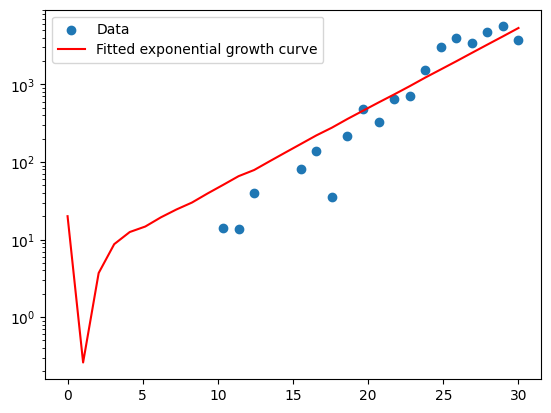

In [115]:
# Define the exponential growth function
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# Generate some example data
x = np.linspace(0, 30, 30) #np.linspace(0, 4, 50)
y = cases_ny[:30].values #3 * np.exp(1.5 * x) + np.random.normal(0, 0.5, len(x))  # Adding some noise to the data

# Fit the data to the exponential growth function
# params, covariance = curve_fit(exp_growth, x, y)

# Predicted values
# y_fit = exp_growth(x, *params)

# Plot the original data and the fitted curve
plt.scatter(x, y, label='Data')
plt.plot(x, infections_mean[:30], color='red', label='Fitted exponential growth curve')
plt.yscale('log')
plt.legend()
plt.show()


# print(f"a = {params[0]}, b = {params[1]}")


# WA

In [76]:
cases_king = df_cases_us_mainland.iloc[3:,2935]

In [78]:
cases_king[:30].values

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,   76.09122077,   45.73034616,   76.25770918,
        106.68593865,  150.39346675,  293.2464633 ,  104.08415191,
        184.82742632,  168.07389291,    0.        ,  457.9126541 ,
       1027.0307908 , 1097.67681548,  795.44088332,  808.76615965,
          0.        , 1388.48688592, 1106.41875726,    0.        ,
       1811.15497276, 1410.91439593, 1983.26431613, 1490.82767253,
       1790.35968412,    0.        ])

In [130]:
i0 = 100
infections = np.zeros((20,40))
infections[:,0] = i0
for e_idx in range(20):
    for i in range(40):
        infector = infections[e_idx,i]
        new = np.int64(infector*np.exp(1.))
    #     print('new infections:', new)
        latency_p = gamma.rvs(a=Z, scale=Zb, size=new)
        infectious_p = gamma.rvs(a=D, scale=Db, size=new)
        v = np.random.random_sample(new)
        delay_days = latency_p + v * infectious_p
        for j in range(new):
            delay = np.int64(np.ceil(delay_days[j]) + i)
    #         print(delay)
            if delay < 39:
                infections[e_idx,delay] = infections[e_idx,delay]+1
infections_mean = np.mean(infections,axis=0)

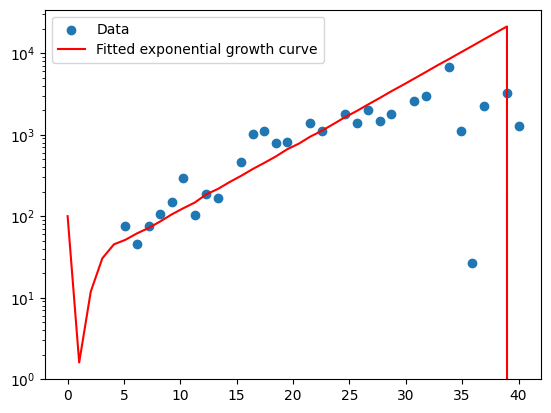

In [132]:
x = np.linspace(0, 40, 40) 
y = cases_king[:40].values 

plt.scatter(x, y, label='Data')
plt.plot(x, infections_mean[:40], color='red', label='Fitted exponential growth curve')
plt.yscale('log')
plt.legend()
plt.show()


# CA

In [86]:
cases_ca = df_cases_us_mainland.iloc[3:,175]
cases_ca[:30].values

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,   99.64615836,   66.58453388,   33.22079177,
         16.59179695,    0.        ,    0.        ,   97.77684347,
        114.41089751,   80.52037225,  129.21086825,  210.44750372,
          0.        ,  678.50235958,  818.54577101,  762.28100009,
        679.18536867, 1010.65399132,    0.        , 1865.9170364 ,
       2053.96912279, 2012.47687961])

In [103]:
i0 = 60
infections = np.zeros((20,40))
infections[:,0] = i0
for e_idx in range(20):
    for i in range(40):
        infector = infections[e_idx,i]
        new = np.int64(infector*np.exp(1.))
    #     print('new infections:', new)
        latency_p = gamma.rvs(a=Z, scale=Zb, size=new)
        infectious_p = gamma.rvs(a=D, scale=Db, size=new)
        v = np.random.random_sample(new)
        delay_days = latency_p + v * infectious_p
        for j in range(new):
            delay = np.int64(np.ceil(delay_days[j]) + i)
    #         print(delay)
            if delay < 39:
                infections[e_idx,delay] = infections[e_idx,delay]+1
infections_mean = np.mean(infections,axis=0)

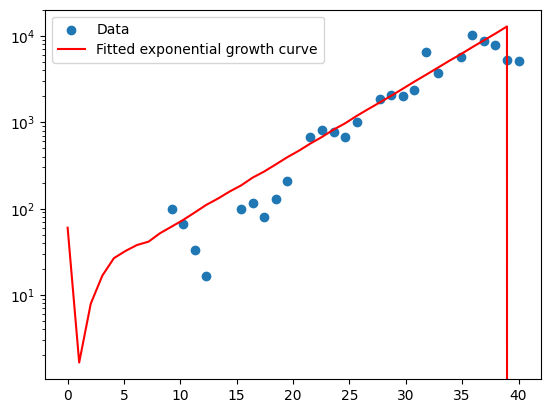

In [104]:
x = np.linspace(0, 40, 40) 
y = cases_ca[:40].values 

plt.scatter(x, y, label='Data')
plt.plot(x, infections_mean[:40], color='red', label='Fitted exponential growth curve')
plt.yscale('log')
plt.legend()
plt.show()

# IL

In [105]:
cases_il = df_cases_us_mainland.iloc[3:,576]
cases_il[:30].values

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,   16.16985188,   17.92740568,
          0.        ,    0.        ,   17.07569077,    0.        ,
         15.03370055,   15.20550143,    0.        ,   59.4018682 ,
        163.26095744,   73.86034748,  190.42862122,  146.70223097,
          0.        ,  171.43454544,  632.38914989,  967.22167935,
       1327.97246118,    0.        , 3578.49127338, 3495.44844461,
       1592.43645808, 3803.72940086])

In [127]:
i0 = 20
infections = np.zeros((20,40))
infections[:,0] = i0
for e_idx in range(20):
    for i in range(40):
        infector = infections[e_idx,i]
        new = np.int64(infector*np.exp(1.2))
    #     print('new infections:', new)
        latency_p = gamma.rvs(a=Z, scale=Zb, size=new)
        infectious_p = gamma.rvs(a=D, scale=Db, size=new)
        v = np.random.random_sample(new)
        delay_days = latency_p + v * infectious_p
        for j in range(new):
            delay = np.int64(np.ceil(delay_days[j]) + i)
    #         print(delay)
            if delay < 39:
                infections[e_idx,delay] = infections[e_idx,delay]+1
infections_mean = np.mean(infections,axis=0)

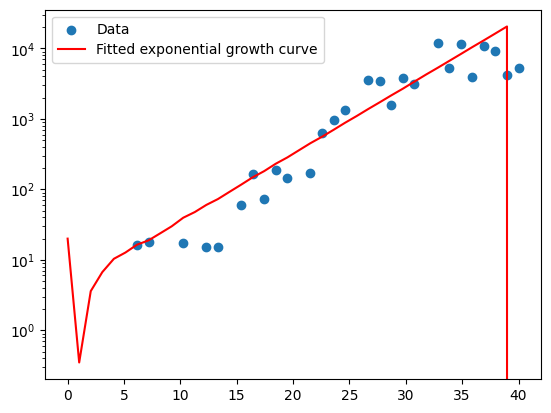

In [129]:
x = np.linspace(0, 40, 40) 
y = cases_il[:40].values 

plt.scatter(x, y, label='Data')
plt.plot(x, infections_mean[:40], color='red', label='Fitted exponential growth curve')
plt.yscale('log')
plt.legend()
plt.show()

# FL

In [17]:
cases_orange = df_cases_us_mainland.iloc[3:,338]

In [23]:
cases_orange[:40].values

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   9.48818342,
         9.22441814,   0.        ,  32.19945605,  23.21452204,
        72.56213085,  28.98271108,  42.70824735,  28.68396767,
       107.11366431,  13.82085474, 178.12175267, 197.08859419,
       254.88397091, 255.18752968, 190.99635186, 216.24565735,
       359.06303688,  84.21507556, 656.83811181, 268.73818381])

In [21]:
i0 = 1
infections = np.zeros((20,40))
infections[:,0] = i0
for e_idx in range(20):
    for i in range(40):
        infector = infections[e_idx,i]
        new = np.int64(infector*np.exp(1.2))
    #     print('new infections:', new)
        latency_p = gamma.rvs(a=Z, scale=Zb, size=new)
        infectious_p = gamma.rvs(a=D, scale=Db, size=new)
        v = np.random.random_sample(new)
        delay_days = latency_p + v * infectious_p
        for j in range(new):
            delay = np.int64(np.ceil(delay_days[j]) + i)
    #         print(delay)
            if delay < 39:
                infections[e_idx,delay] = infections[e_idx,delay]+1
infections_mean = np.mean(infections,axis=0)

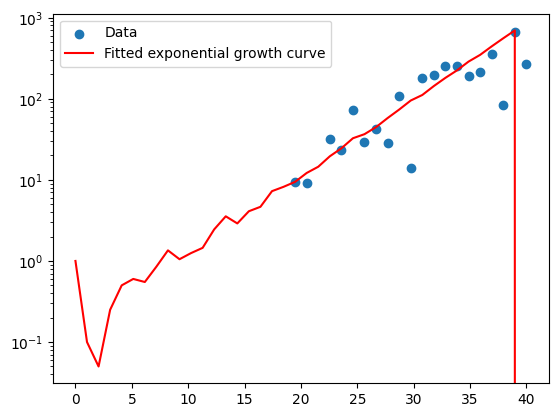

In [22]:
x = np.linspace(0, 40, 40) 
y = cases_orange[:40].values 

plt.scatter(x, y, label='Data')
plt.plot(x, infections_mean[:40], color='red', label='Fitted exponential growth curve')
plt.yscale('log')
plt.legend()
plt.show()